## Import librairies

Libraries list in the document _environment.yml_ .

In [163]:
import json
import pprint
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy

# Prepare data

## Open and inspect file
In this section, the data are inspected a first time. Here, we import the downloaded Geovistory output.

Please verify that the file name corresponds to the downloaded one

In [106]:
file = 'data/table-873986-export.json'

In [107]:
### Open the file and crate a dictionary in the 'data' file
with open(file) as json_file:
    data = json.load(json_file)
print(type(data), '\n-----')
# noms des objets racine du fichier JSON
z = [print(a) for a in data]

<class 'dict'> 
-----
columns
rows


In [108]:
### Number of rows
rows = data['rows']
len(rows)

28003

In [109]:
### Get the columns names
columns = data['columns']
pprint.pprint(columns)

{'col_0': 'Entity Preview', 'col_1': 'Birth Date', 'col_2': 'Group'}


In [112]:
### Explore
# [pprint.pprint(r) for r in rows[99:101]]

In [114]:
for r in rows[:2]:
    print(r['col_1']['values'][0]['value']['timePrimitive']['from']['calGregorian'][:4], r['col_2']['entities'][0]['entity_label'])

1807 Halbkanton Basel-Stadt
1807 Halbkanton Basel-Stadt


In [115]:
res_1 = [[r['col_1']['values'][0]['value']['timePrimitive']['from']['calGregorian'][:4], r['col_2']['entities'][0]['entity_label']]\
         for r in rows]

In [116]:
len(res_1), res_1[:4]

(28003,
 [['1807', 'Halbkanton Basel-Stadt'],
  ['1807', 'Halbkanton Basel-Stadt'],
  ['1811', 'Großherzogtum Baden'],
  ['1797', 'Halbkanton Basel-Landschaft']])

In [118]:
### Minimal birth year and maximal age in 1860

min([l[0] for l in res_1]), 1860-int(min([l[0] for l in res_1]))

('1765', 95)

In [120]:
### Separate people from Basel and others

age_bas_1860 = []
age_ext_1860 = []
for l in res_1:
    if 'Basel-Stadt' in l[1]:
        age_bas_1860.append(1860 - int(l[0]))
    else:
        age_ext_1860.append(1860 - int(l[0]))
len(age_bas_1860), len(age_ext_1860)

(11680, 16323)

In [121]:
age_bas_1860[:4], age_ext_1860[:4]

([53, 53, 6, 4], [49, 63, 24, 27])

### Create age classes

In [149]:
i = 1
age_classes = []
while i < 101:
    age_classes.append([i, i+4])
    i += 5
age_classes[-1:], len(age_classes)

([[96, 100]], 20)

In [150]:
cut_list = [l[0] for l in age_classes]

In [151]:
age_bas_1860_cut = pd.Series(pd.cut(age_bas_1860,cut_list))
age_bas_1860_cut[:4]

0    (51, 56]
1    (51, 56]
2      (1, 6]
3      (1, 6]
dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] < (81, 86] < (86, 91] < (91, 96]]

In [152]:
l_bas = age_bas_1860_cut.groupby(age_bas_1860_cut).count()
print(len(l_bas), '\n'*2,l_bas)

19 

 (1, 6]      1233
(6, 11]     1109
(11, 16]     995
(16, 21]     928
(21, 26]     829
(26, 31]     823
(31, 36]     840
(36, 41]     815
(41, 46]     712
(46, 51]     652
(51, 56]     663
(56, 61]     603
(61, 66]     380
(66, 71]     249
(71, 76]     184
(76, 81]      84
(81, 86]      24
(86, 91]       5
(91, 96]       2
dtype: int64


In [153]:
age_ext_1860_cut = pd.Series(pd.cut(age_ext_1860,cut_list))
age_ext_1860_cut[:4]

0    (46, 51]
1    (61, 66]
2    (21, 26]
3    (26, 31]
dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] < (81, 86] < (86, 91] < (91, 96]]

In [154]:
l_ext = age_ext_1860_cut.groupby(age_ext_1860_cut).count()
print(len(l_ext), '\n'*2,l_ext)

19 

 (1, 6]       918
(6, 11]      896
(11, 16]    1161
(16, 21]    2525
(21, 26]    2740
(26, 31]    2008
(31, 36]    1552
(36, 41]    1151
(41, 46]     808
(46, 51]     642
(51, 56]     549
(56, 61]     326
(61, 66]     252
(66, 71]     159
(71, 76]      98
(76, 81]      37
(81, 86]      15
(86, 91]       2
(91, 96]       1
dtype: int64


In [155]:
age_classes_str = [m.replace('[','').replace(']','') for m in map(str,age_classes[:-1])]
age_classes_str[:4]

['1, 5', '6, 10', '11, 15', '16, 20']

## Create the data frame 

In [156]:
df = pd.DataFrame({'Age': age_classes_str, 
                    'External': list(l_ext), 
                    'Basel': [e * -1 for e in list(l_bas)]})
df

,Age,External,Basel
0,"1, 5",918,-1233
1,"6, 10",896,-1109
2,"11, 15",1161,-995
3,"16, 20",2525,-928
4,"21, 25",2740,-829
5,"26, 30",2008,-823
6,"31, 35",1552,-840
7,"36, 40",1151,-815
8,"41, 45",808,-712
9,"46, 50",642,-652


In [157]:
age_classes_str.reverse()
age_classes_str_rev = copy.deepcopy(age_classes_str)
age_classes_str.reverse()

In [158]:
age_classes_str_rev[:4], age_classes_str[:4]

(['91, 95', '86, 90', '81, 85', '76, 80'],
 ['1, 5', '6, 10', '11, 15', '16, 20'])

[]

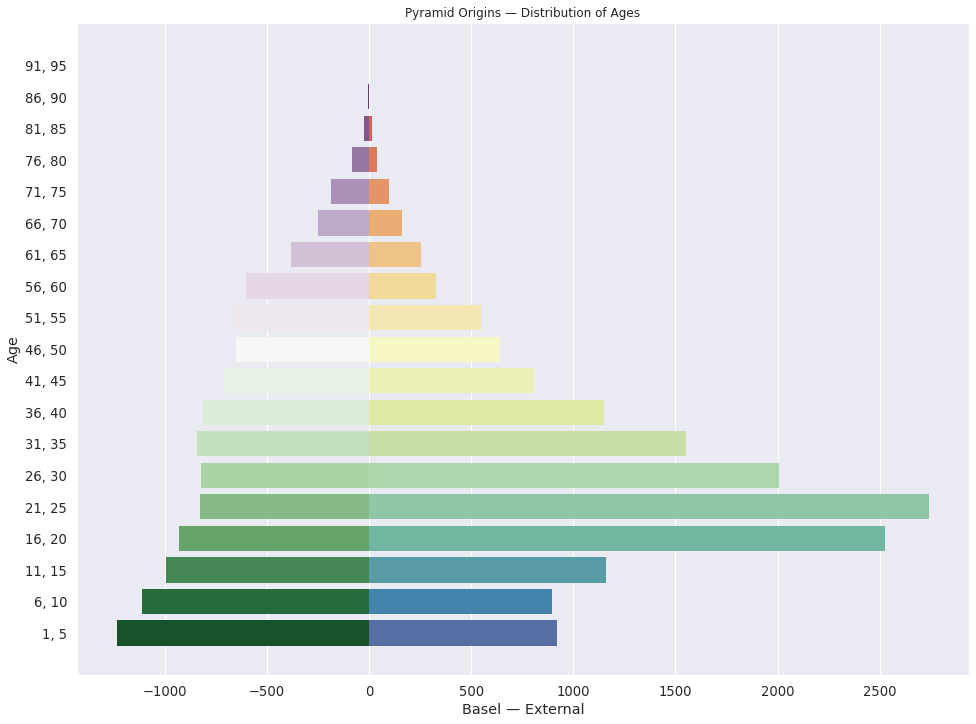

In [159]:

# https://towardsdatascience.com/different-bar-charts-in-python-6d984b9c6b17

# Prepare Data
plt.rcParams["figure.figsize"] = (16, 12)

#Class
AgeClass = age_classes_str_rev
#Chart
bar_plot = sns.barplot(x='External', y='Age', data=df, order=AgeClass, lw=0, palette="Spectral")
bar_plot = sns.barplot(x='Basel', y='Age', data=df, order=AgeClass, lw=0, palette="PRGn")
plt.title("Pyramid Origins — Distribution of Ages", fontsize=12)
plt.xlabel("Basel — External")
plt.savefig('graphics/pyramid_origins_age_1860.jpg')
plt.plot()


In [160]:
year_origin = pd.DataFrame(res_1, columns = ['year','origin'])
year_origin['year'] = year_origin['year'].apply(lambda x : int(x))
year_origin

,year,origin
0,1807,Halbkanton Basel-Stadt
1,1807,Halbkanton Basel-Stadt
2,1811,Großherzogtum Baden
3,1797,Halbkanton Basel-Landschaft
4,1854,Halbkanton Basel-Stadt
...,...,...
27998,1809,Kanton Aargau
27999,1826,Großherzogtum Baden
28000,1834,Halbkanton Basel-Stadt
28001,1793,Halbkanton Basel-Stadt


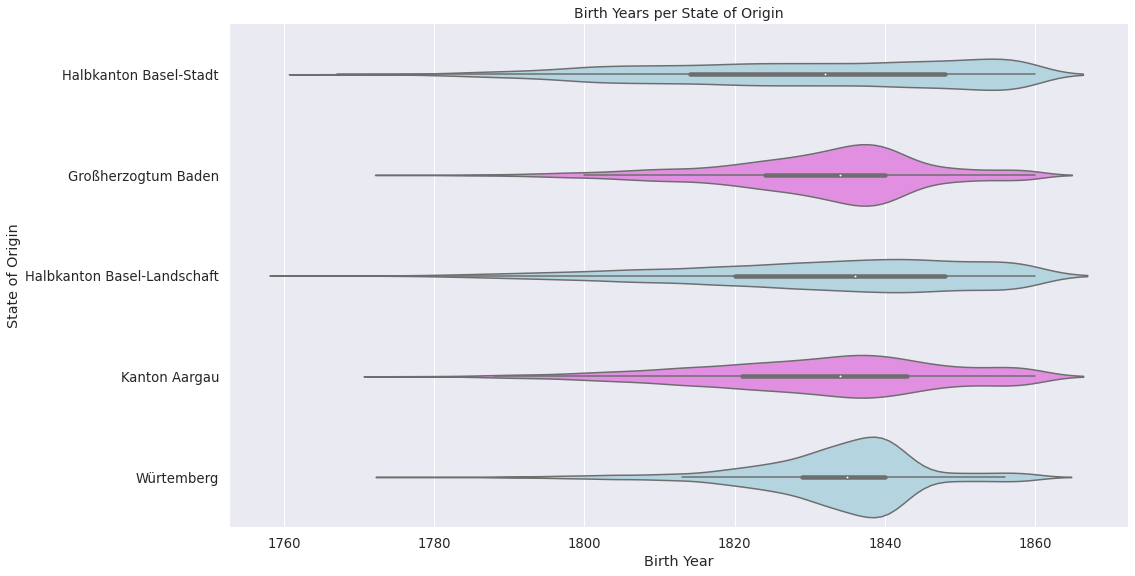

In [161]:
### https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.set(font_scale = 1.2)
ax = sns.catplot(kind="violin", x="year", y="origin", orient="h", height=8,aspect=2, 
                    data=year_origin \
                 , palette=['lightblue','violet'], split=True)
plt.xlabel("Birth Year")
plt.ylabel("State of Origin")
plt.title("Birth Years per State of Origin", fontsize=14)
plt.savefig('graphics/birth_years_state_of_origin.jpg')